In [49]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [84]:
from tensorflow.keras.datasets import fashion_mnist

In [85]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

In [74]:
X_train.shape

(60000, 28, 28)

In [75]:
y_train.shape

(60000,)

In [76]:
X_test.shape

(10000, 28, 28)

In [77]:
y_test.shape

(10000,)

In [78]:
%matplotlib inline


In [79]:
import matplotlib.pyplot as plt

In [80]:
import seaborn as sns

In [81]:
# sns.set(font_scale=2)

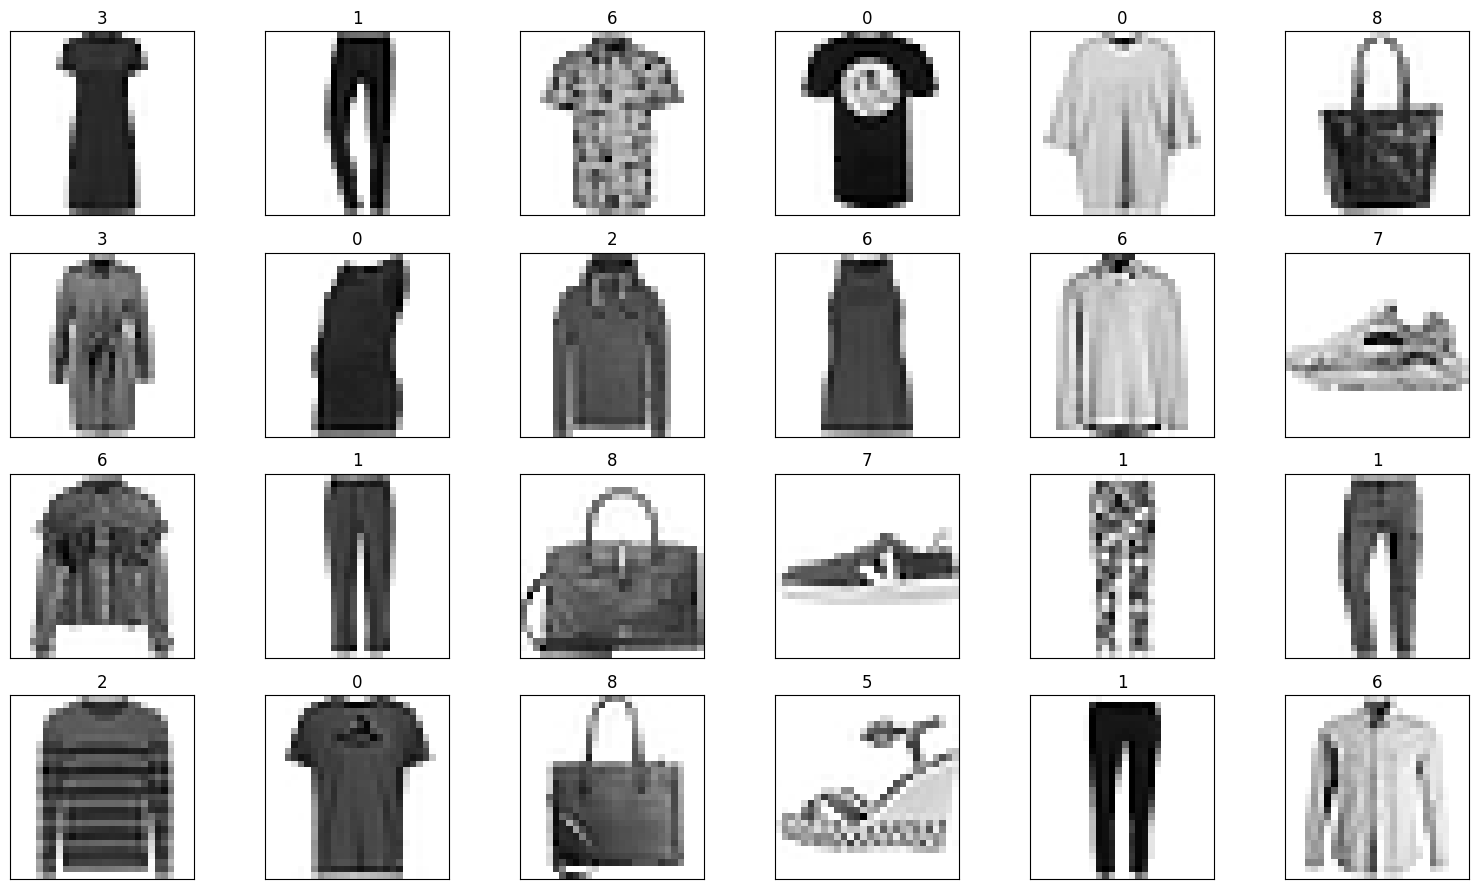

In [86]:
import numpy as np
index=np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes=plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target=item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

    plt.tight_layout()